In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models


In [6]:
tf.__version__

'2.9.2'

In [2]:
train_ds = tf.keras.utils.image_dataset_from_directory("./data/caltech101/101_ObjectCategories",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(227, 227),
  batch_size=4,label_mode='categorical')

Found 9144 files belonging to 102 classes.
Using 7316 files for training.
Metal device set to: Apple M1


2022-08-30 19:46:51.005535: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-30 19:46:51.005632: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
validation_ds = tf.keras.utils.image_dataset_from_directory("./data/caltech101/101_ObjectCategories",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(227, 227),
  batch_size=4, label_mode='categorical')

Found 9144 files belonging to 102 classes.
Using 1828 files for validation.


In [4]:
class_names = train_ds.class_names


2022-08-30 19:46:51.616961: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


TypeError: only integer scalar arrays can be converted to a scalar index

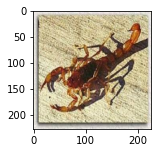

In [5]:
import matplotlib.pyplot as plt
# import PIL
# import PIL.Image

plt.figure(figsize = (10,10))

for images, labels in validation_ds.take(1):
    for i in range(4):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        

In [6]:
tf.config.list_physical_devices('GPU') 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(96, kernel_size = 11, strides = 4, activation = 'relu', input_shape = (227,227,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size = (3,3), strides = (2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(256, 5, activation = 'relu'))
model.add(layers.BatchNormalization())    # cant figure out how to use local response normalization in tensorflow
model.add(layers.MaxPooling2D(pool_size = (3,3), strides = (2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(384,3, activation = 'relu'))
model.add(layers.Conv2D(384,3, activation = 'relu'))
model.add(layers.Conv2D(256,3, activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation = 'relu'))
model.add(layers.Dense(102, activation = 'softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 27, 27, 96)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 23, 23, 256)     

In [13]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])              

In [14]:
history = model.fit(train_ds, epochs = 50, validation_data = validation_ds )

Epoch 1/50


2022-08-30 19:52:39.448188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1828/1829 [============================>.] - ETA: 0s - loss: 3.7521 - accuracy: 0.2317

2022-08-30 19:54:00.316229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1829/1829 [==============================] - 86s 46ms/step - loss: 3.7519 - accuracy: 0.2317 - val_loss: 3.4967 - val_accuracy: 0.3162
Epoch 2/50
1829/1829 [==============================] - 86s 47ms/step - loss: 3.0228 - accuracy: 0.3401 - val_loss: 2.7993 - val_accuracy: 0.3895
Epoch 3/50
1829/1829 [==============================] - 86s 47ms/step - loss: 2.5016 - accuracy: 0.4251 - val_loss: 2.4125 - val_accuracy: 0.4458
Epoch 4/50
1829/1829 [==============================] - 84s 46ms/step - loss: 2.0609 - accuracy: 0.5025 - val_loss: 2.3580 - val_accuracy: 0.4716
Epoch 5/50
1829/1829 [==============================] - 260s 142ms/step - loss: 1.7118 - accuracy: 0.5808 - val_loss: 2.2929 - val_accuracy: 0.4874
Epoch 6/50
1829/1829 [==============================] - 83s 45ms/step - loss: 1.3455 - accuracy: 0.6517 - val_loss: 2.0595 - val_accuracy: 0.5279
Epoch 7/50
1829/1829 [==============================] - 84s 46ms/step - loss: 1.1095 - accuracy: 0.7016 - val_loss: 2.1170 - val_accu